In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
east_comp = pd.read_excel("response_spec_data.xlsx", sheet_name = "East")
north_comp = pd.read_excel("response_spec_data.xlsx", sheet_name= "north")
vert_comp = pd.read_excel("response_spec_data.xlsx", sheet_name= "vert-")


In [7]:
east_comp

,T,A,V,D
0,0.000,0.079006,0.000000,0.000000e+00
1,0.010,0.090115,0.000025,2.279040e-07
2,0.015,0.090709,0.000051,5.213876e-07
3,0.020,0.089380,0.000109,8.909088e-07
4,0.030,0.112161,0.000264,2.498399e-06
5,0.040,0.103241,0.000386,4.246778e-06
6,0.050,0.193524,0.001103,1.214329e-05
7,0.060,0.185658,0.001318,1.679150e-05
8,0.075,0.162902,0.001483,2.234816e-05
9,0.090,0.218597,0.003188,4.593973e-05


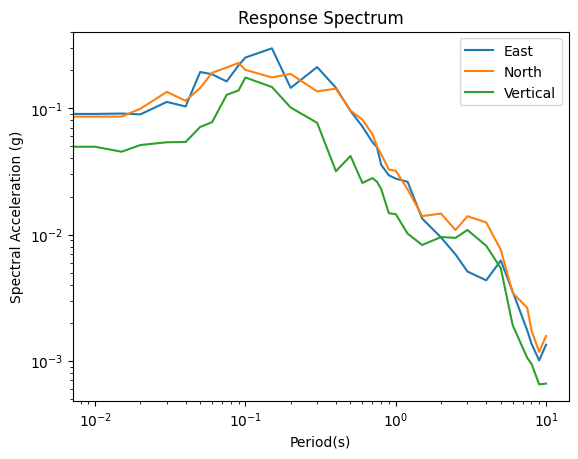

In [73]:
plt.plot(east_comp["T"], east_comp["A"], label = "East")
plt.plot(north_comp["T"], north_comp["A"], label = "North")
plt.plot(vert_comp["T"], vert_comp["A"], label = "Vertical")

plt.xscale("log")
plt.yscale("log")

plt.xlabel("Period(s)")
plt.ylabel("Spectral Acceleration (g)")

plt.title("Response Spectrum")

plt.legend()



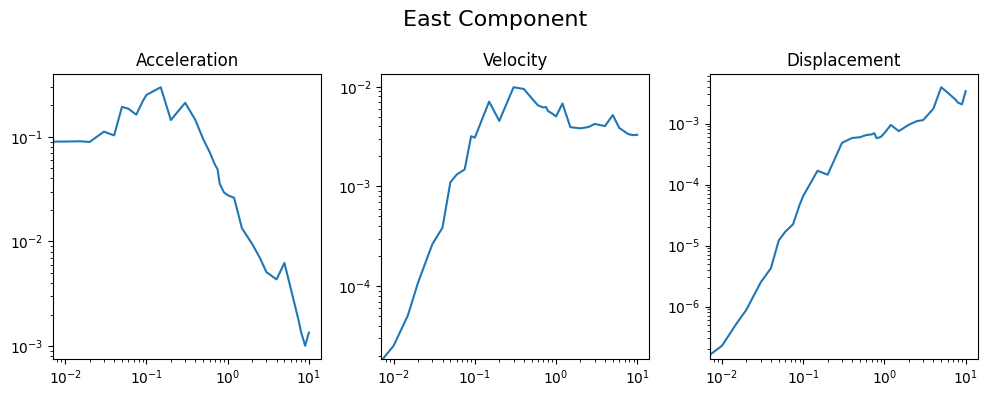

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))  # Adjust figsize as needed

axs[0].plot(east_comp["T"], east_comp['A'])
axs[0].set_title('Acceleration')  # Set title for the subplot

axs[1].plot(east_comp["T"], east_comp["V"])
axs[1].set_title('Velocity')  # Set title for the subplot

axs[2].plot(east_comp["T"], east_comp["D"])
axs[2].set_title('Displacement')  # Set title for the subplot


fig.suptitle('East Component', fontsize=16)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [8]:
east_acc_TH = pd.read_excel("time_history.xlsx", sheet_name="east_comp")

In [8]:
east_acc_TH

,time,a
0,0.00,-0.0014
1,0.02,-0.0013
2,0.04,0.0004
3,0.06,0.0036
4,0.08,0.0048
...,...,...
2131,42.62,0.0074
2132,42.64,0.0073
2133,42.66,0.0051
2134,42.68,-0.0009


In [9]:
def calculate_velocity(acceleration, time):
    # Calculate the time step
    dt = np.diff(time)
    
    # Use the trapezoidal rule for numerical integration
    velocity = np.cumsum(0.5 * (acceleration[1:-1] + acceleration[1:]) * dt)
    
    return velocity

In [10]:
east_vel_TH = calculate_velocity(east_acc_TH['a'], east_acc_TH['time'])
east_dis_TH = calculate_velocity(east_vel_TH, east_acc_TH['time'][1:])

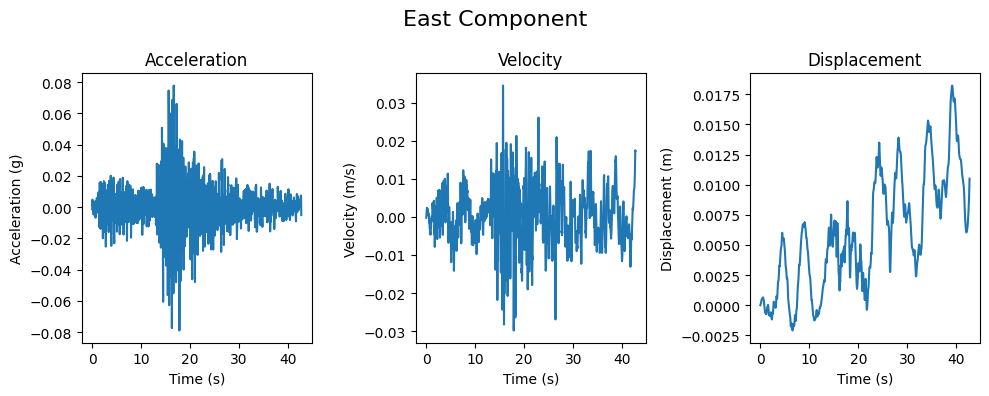

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(10, 4))  # Adjust figsize as needed

axs[0].plot(east_acc_TH["time"], east_acc_TH['a'])
axs[0].set_title('Acceleration')  # Set title for the subplot
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("Acceleration (g)")

axs[1].plot(east_acc_TH["time"][1:], east_vel_TH*9.81)
axs[1].set_title('Velocity')  # Set title for the subplot
axs[1].set_xlabel("Time (s)")
axs[1].set_ylabel("Velocity (m/s)")

axs[2].plot(east_acc_TH["time"][2:], east_dis_TH*9.81)
axs[2].set_title('Displacement')  # Set title for the subplot
axs[2].set_xlabel("Time (s)")
axs[2].set_ylabel("Displacement (m)")



fig.suptitle('East Component', fontsize=16)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [12]:
north_acc_TH = pd.read_excel("time_history.xlsx", sheet_name="north_comp")

In [13]:
wnorth_vel_TH = calculate_velocity(north_acc_TH['time'], north_acc_TH['a'])
north_dis_TH = calculate_velocity(north_vel_TH, north_acc_TH['a'][1:])

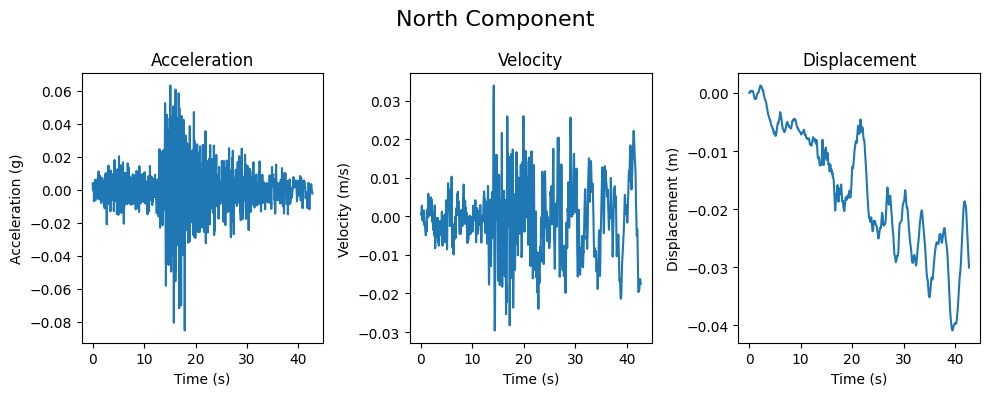

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(10, 4))  # Adjust figsize as needed

axs[0].plot(north_acc_TH["a"], north_acc_TH['time'])
axs[0].set_title('Acceleration')  # Set title for the subplot
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("Acceleration (g)")

axs[1].plot(north_acc_TH["a"][1:], north_vel_TH*9.81)
axs[1].set_title('Velocity')  # Set title for the subplot
axs[1].set_xlabel("Time (s)")
axs[1].set_ylabel("Velocity (m/s)")

axs[2].plot(north_acc_TH["a"][2:], north_dis_TH*9.81)
axs[2].set_title('Displacement')  # Set title for the subplot
axs[2].set_xlabel("Time (s)")
axs[2].set_ylabel("Displacement (m)")


fig.suptitle('North Component', fontsize=16)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [16]:
vert_acc_TH = pd.read_excel("time_history.xlsx", sheet_name="west_comp")

In [17]:
vert_vel_TH = calculate_velocity(vert_acc_TH['a'], vert_acc_TH['time'])
vert_dis_TH = calculate_velocity(vert_vel_TH, vert_acc_TH['time'][1:])

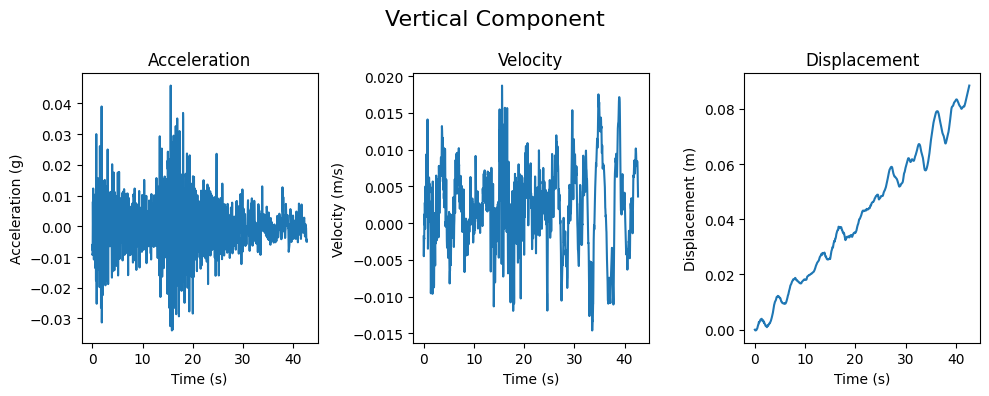

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(10, 4))  # Adjust figsize as needed

axs[0].plot(vert_acc_TH["time"], vert_acc_TH['a'])
axs[0].set_title('Acceleration')  # Set title for the subplot
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("Acceleration (g)")

axs[1].plot(vert_acc_TH["time"][1:], vert_vel_TH*9.81)
axs[1].set_title('Velocity')  # Set title for the subplot
axs[1].set_xlabel("Time (s)")
axs[1].set_ylabel("Velocity (m/s)")

axs[2].plot(vert_acc_TH["time"][2:], vert_dis_TH*9.81)
axs[2].set_title('Displacement')  # Set title for the subplot
axs[2].set_xlabel("Time (s)")
axs[2].set_ylabel("Displacement (m)")


fig.suptitle('Vertical Component', fontsize=16)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [4]:
east_comp = pd.read_excel("book2 (1).xlsx", sheet_name = "east_comp")
north_comp = pd.read_excel("book2 (1).xlsx", sheet_name= "north_comp")
vert_comp = pd.read_excel("book2 (1).xlsx", sheet_name= "vert_comp")

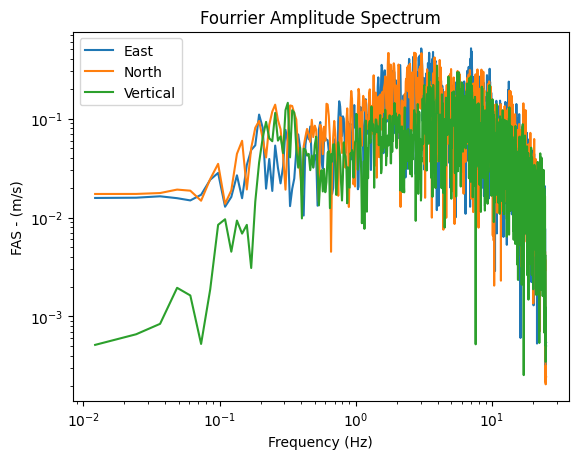

In [6]:
plt.plot(east_comp["f"], east_comp["u"]*9.81, label = "East")
plt.plot(north_comp["f"], north_comp["u"]*9.81, label = "North")
plt.plot(vert_comp["f"], vert_comp["u"]*9.81, label = "Vertical")

plt.xscale("log")
plt.yscale("log")

plt.title("Fourrier Amplitude Spectrum")


plt.xlabel("Frequency (Hz)")
plt.ylabel("FAS - (m/s)")

plt.legend()

In [82]:
x[0]

array([-5.])